 # Analyze my Spotify data  ![title](Spotify_Logo.png)

## AIM
___
___
The purpose of this notebook is simple :
1. Getting an overview of my spotify listings
2. Strengthen on data analysis and visualizaton

#### Road map
___
To carry out this analysis I had to go through a few steps 
1. Ask potify for acces to my data
2. Select the data of interest
3. Import and merge data
4. Analyze the data

# 1-2/ Acces to the Data and select 
---
So i made a request to Spotify for acces to my data. I received a folder with 10 JSON files.
After some research, we will onli focus on the 3 JSON files that i find the most interesting i.e the **listening history**
For each observation we have the following structure :
* *endTime* : Date and the time of listening
* *artistName* : Name of the artist 
* *trackName* : Name of the track
* *msPlayed* : Listening Time in Milisecond

# 3/ Import and Merge Data 

In [10]:
#Import Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="whitegrid")

In [11]:
#Import Data 
df1 = pd.read_json('MyData/StreamingHistory0.json')
df2 = pd.read_json('MyData/StreamingHistory1.json')
df3 = pd.read_json('MyData/StreamingHistory2.json')


In [12]:
#Merge all_Dataframe
df = pd.concat([df1, df2, df3])
df.head()


,endTime,artistName,trackName,msPlayed
0,2019-09-11 19:04,Damso,Humains - Bonus Track,140627
1,2019-09-12 04:23,Damso,Humains - Bonus Track,5903
2,2019-09-12 04:25,Kalash,JTC,137294
3,2019-09-12 04:31,Vegedream,Personne,146793
4,2019-09-12 06:27,Vegedream,Personne,232689


In [13]:
#Check the data type
df.dtypes

endTime       object
artistName    object
trackName     object
msPlayed       int64
dtype: object

In [14]:
#We just need to pass the Endtime to a DateTimeformat
df['endTime']= pd.to_datetime(df['endTime'])
df.dtypes

endTime       datetime64[ns]
artistName            object
trackName             object
msPlayed               int64
dtype: object

# 4/ Analyze the Data

## Top artistes 

In [31]:
top_artist = df["artistName"].value_counts()[:10] # Get the top ten artisit 
top_artist

Damso                    3152
Ninho                    1800
Dadju                    1095
Nekfeu                   1054
Booba                     549
D.A.V                     393
Unknown Brain             390
47ter                     369
SuperPhysique Podcast     365
Vegedream                 362
Name: artistName, dtype: int64

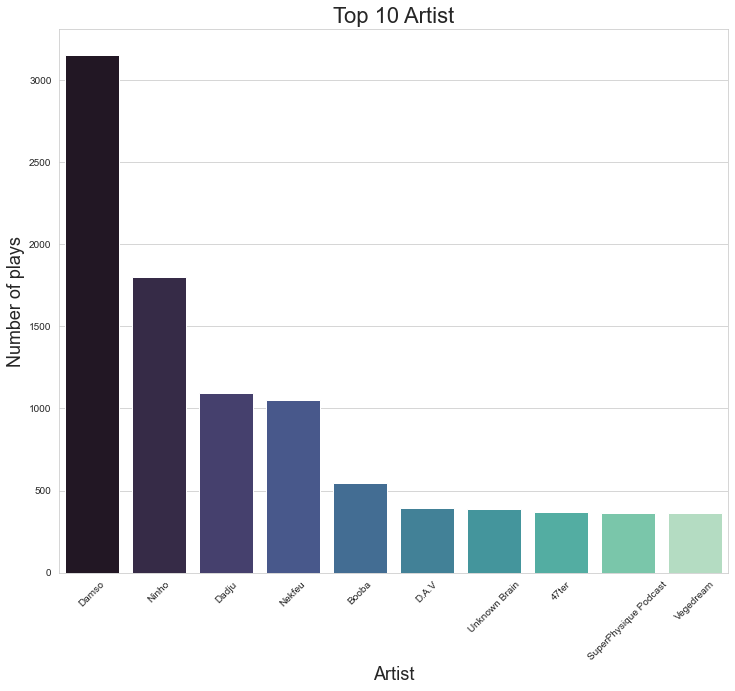

In [32]:
fig = plt.figure(figsize=(12,10))
ax = sns.barplot(x=top_artist.index, y=top_artist.values, palette="mako")
plt.xticks(rotation=45)
plt.ylabel('Number of plays', fontsize=18)
plt.xlabel('Artist', fontsize=18)
plt.title("Top 10 Artist",fontsize=22)
plt.savefig('TopArtist.png')
plt.show()




## Top Tracks

In [33]:
top_tracks = df["trackName"].value_counts()[:10] # Get the top ten tracks 
top_tracks

Superhero                391
ParoVie (feat. Damso)    391
Promo (feat. Damso)      388
Θ. Macarena              387
Tricheur                 367
Personne                 358
Ζ. Kietu                 285
Robe                     284
Ipséité - Bonus Track    225
La zone feat. Booba      181
Name: trackName, dtype: int64

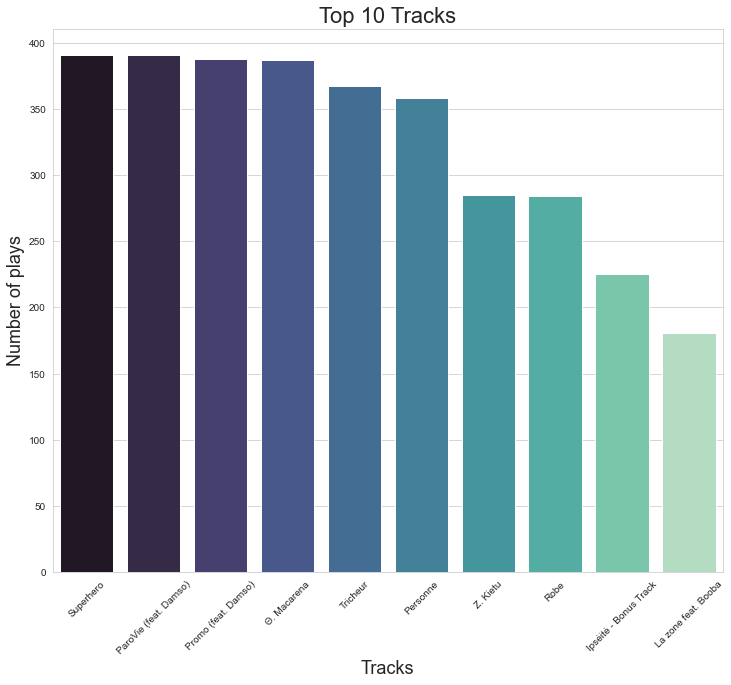

In [34]:
fig = plt.figure(figsize=(12,10))
ax = sns.barplot(x=top_tracks.index, y=top_tracks.values, palette="mako")
plt.xticks(rotation=45)
plt.ylabel('Number of plays', fontsize=18)
plt.xlabel('Tracks', fontsize=18)
plt.title("Top 10 Tracks",fontsize=22)
plt.savefig('TopTracks.png')
plt.show()



In [35]:
df['Month'] = pd.DatetimeIndex(df['endTime']).month

In [36]:
Listeningtime_per_month =df['msPlayed'].groupby(df['Month']).sum()
Listeningtime_per_month.values

array([389216470, 338811814, 195579156, 210097669, 265189075, 298963931,
       311494923, 422671352, 324816752, 317298416, 357247799, 475383597],
      dtype=int64)

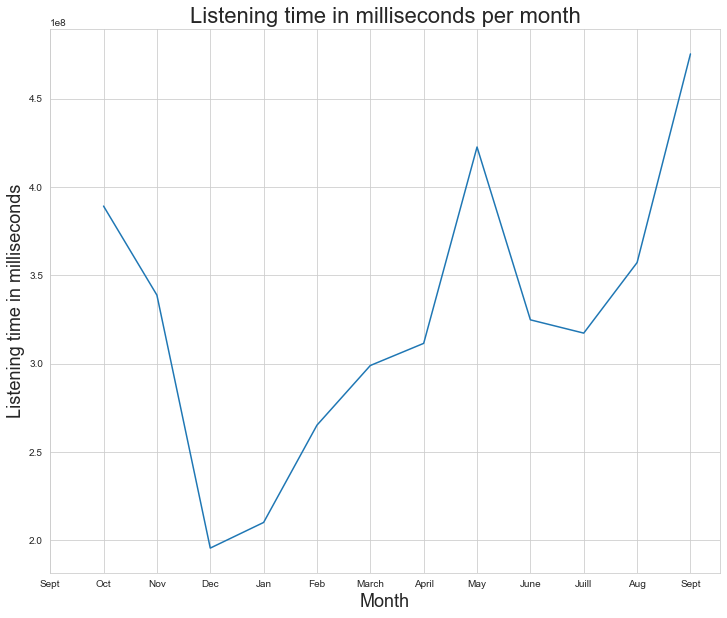

In [37]:
fig = plt.figure(figsize=(12,10))
ax =sns.lineplot(y=Listeningtime_per_month.values, x=Listeningtime_per_month.index, palette="mako")
plt.xticks(np.arange(13), ('Sept','Oct','Nov','Dec','Jan','Feb', 'March','April','May','June','Juill','Aug','Sept'))
plt.ylabel('Listening time in milliseconds', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.title("Listening time in milliseconds per month",fontsize=22)
plt.savefig('ListeningTimeMonth.png')
plt.show()


## Total listening time

In [38]:
total_listening_time = df['msPlayed'].sum()
total_listening_time

3906770954

 45 day 5 hr. 12 min. 51 sec.

## Listening time by artist

In [39]:
Listeningtime_per_artist =df['msPlayed'].groupby(df['artistName']).sum()
Listeningtime_per_artist
sorted_Listeningtime_per_artist = Listeningtime_per_artist.nlargest(n=10)
sorted_Listeningtime_per_artist

artistName
SuperPhysique Podcast    413556150
Damso                    383450615
LeaderCast               245273516
Ninho                    243473187
Popcorn                  201606278
Nekfeu                   155545613
Dadju                    153926068
Le rendez-vous Tech      143754633
D.A.V                     67782434
Unknown Brain             57385353
Name: msPlayed, dtype: int64

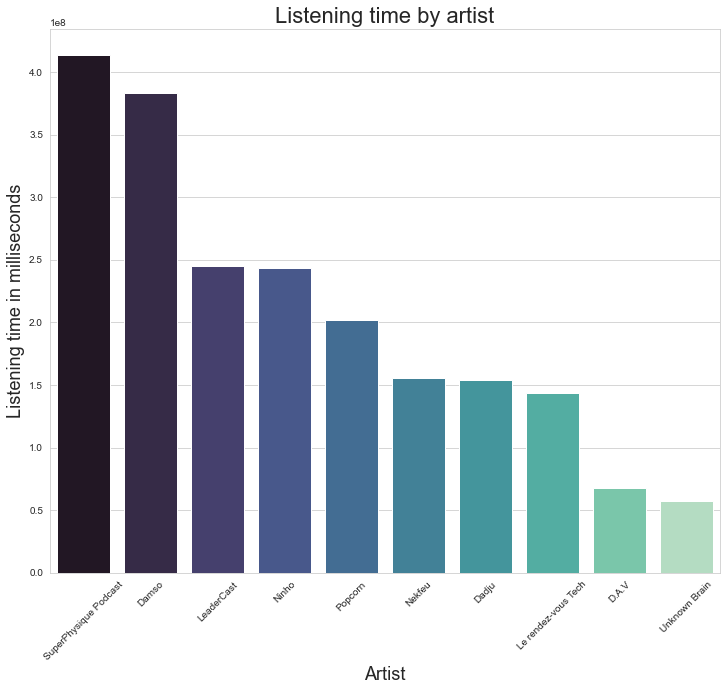

In [40]:
fig = plt.figure(figsize=(12,10))
ax = sns.barplot(x=sorted_Listeningtime_per_artist.index, y=sorted_Listeningtime_per_artist.values, palette="mako")
plt.xticks(rotation=45)
plt.ylabel('Listening time in milliseconds', fontsize=18)
plt.xlabel('Artist', fontsize=18)
plt.title("Listening time by artist",fontsize=22)
plt.savefig('ListeningTimeArtist')
plt.show()



# Listeningtime per song

In [41]:
Listeningtime_per_song =df['msPlayed'].groupby(df['trackName']).sum()
Listeningtime_per_song
sorted_Listeningtime_per_song = Listeningtime_per_song.nlargest(n=10)
sorted_Listeningtime_per_song

trackName
Promo (feat. Damso)        70994257
ParoVie (feat. Damso)      67773215
Tricheur                   66850592
Θ. Macarena                59037150
Superhero                  57302970
Personne                   49945962
Robe                       45980297
Ζ. Kietu                   44570069
Ipséité - Bonus Track      28648684
Crois-moi (feat. Ninho)    24479244
Name: msPlayed, dtype: int64

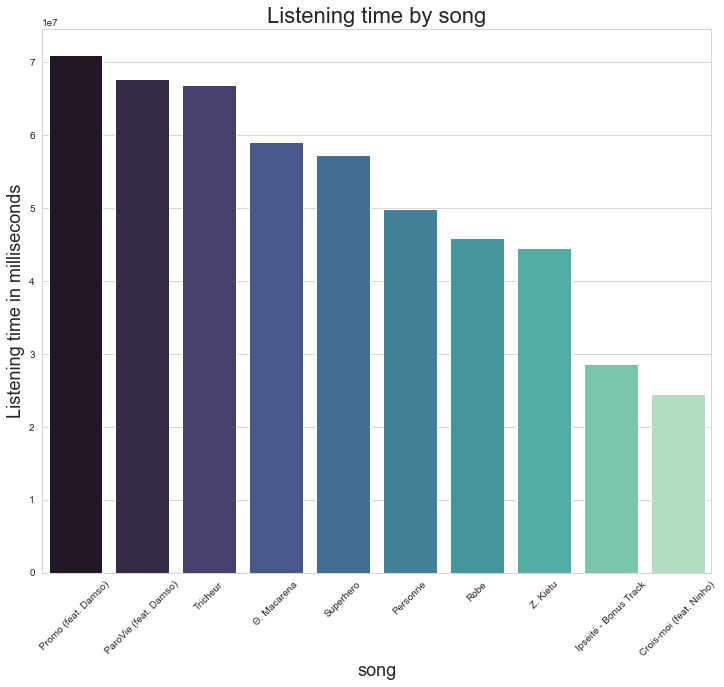

In [42]:
fig = plt.figure(figsize=(12,10))
ax = sns.barplot(x=sorted_Listeningtime_per_song.index, y=sorted_Listeningtime_per_song.values, palette="mako")
plt.xticks(rotation=45)
plt.ylabel('Listening time in milliseconds', fontsize=18)
plt.xlabel('song', fontsize=18)
plt.title("Listening time by song",fontsize=22)
plt.savefig('ListeningTimeSong.png')
plt.show()
